<a href="https://colab.research.google.com/github/mayanknagory/Main-Projects/blob/master/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from catboost import CatBoostClassifier
from scipy.stats import norm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import pickle
from keras import layers
import keras
import tensorflow as tf
plt.style.use(style = 'seaborn')
%matplotlib inline

<ipython-input-6-a8139ee2755d>:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = 'seaborn')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/loan.csv')
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,LP002953,Male,Yes,3+,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,377,LP002974,Male,Yes,0,Graduate,No,3232.0,NaN,108.0,360.0,1.0,Rural,Y
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,379,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
df.dropna(inplace = True)
df =df.replace('3+',4)
df['Dependents'] =  df.Dependents.astype(int)
df['Total_Income'] = df['ApplicantIncome'] + df['ApplicantIncome']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 379
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         272 non-null    int64  
 1   Loan_ID            272 non-null    object 
 2   Gender             272 non-null    object 
 3   Married            272 non-null    object 
 4   Dependents         272 non-null    int64  
 5   Education          272 non-null    object 
 6   Self_Employed      272 non-null    object 
 7   ApplicantIncome    272 non-null    float64
 8   CoapplicantIncome  272 non-null    float64
 9   LoanAmount         272 non-null    float64
 10  Loan_Amount_Term   272 non-null    float64
 11  Credit_History     272 non-null    float64
 12  Property_Area      272 non-null    object 
 13  Loan_Status        272 non-null    object 
 14  Total_Income       272 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 34.0+ KB


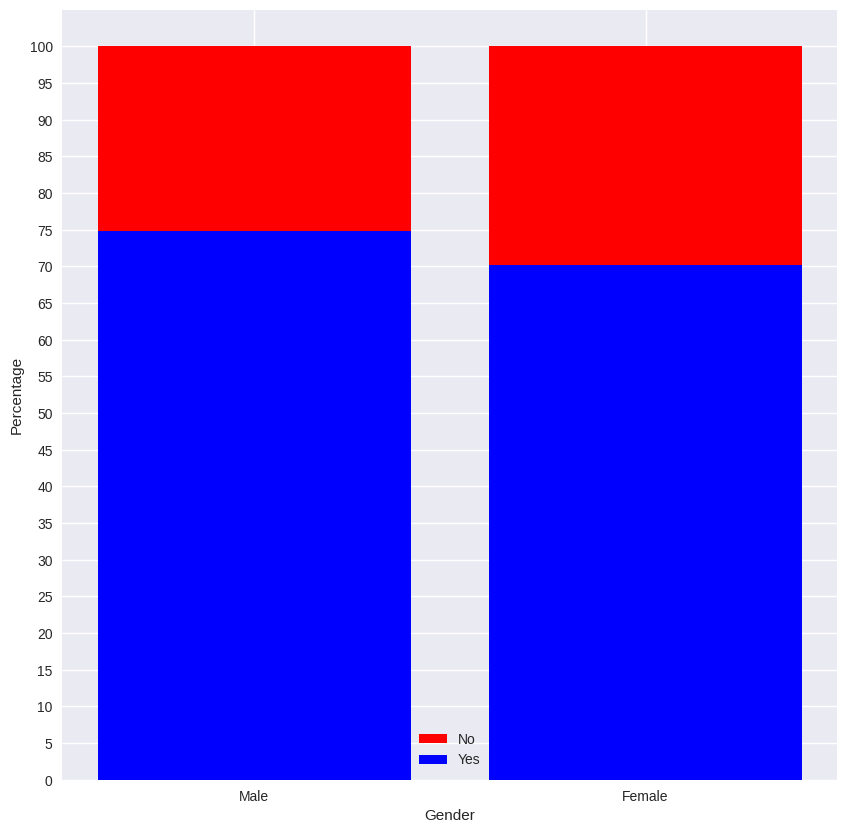

In [ ]:
g = pd.DataFrame(df[['Gender','Loan_Status']].value_counts()).reset_index()
g['per'] = [g.iloc[0,2]/(g.iloc[0,2]+g.iloc[1,2])*100, g.iloc[1,2]/(g.iloc[0,2]+g.iloc[1,2])*100, g.iloc[2,2]/(g.iloc[2,2]+g.iloc[3,2])*100,g.iloc[3,2]/(g.iloc[2,2]+g.iloc[3,2])*100]
x = ['Male','Female']
yy = [g.iloc[0,3],g.iloc[2,3]]
yn = [g.iloc[1,3],g.iloc[3,3]]
plt.figure(figsize=(10,10))
plt.bar(x, yn, label = 'No', color = 'r', bottom = yy)
plt.bar(x, yy, label = 'Yes', color = 'b')
plt.yticks(np.arange(0,105,5))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend()
plt.show()

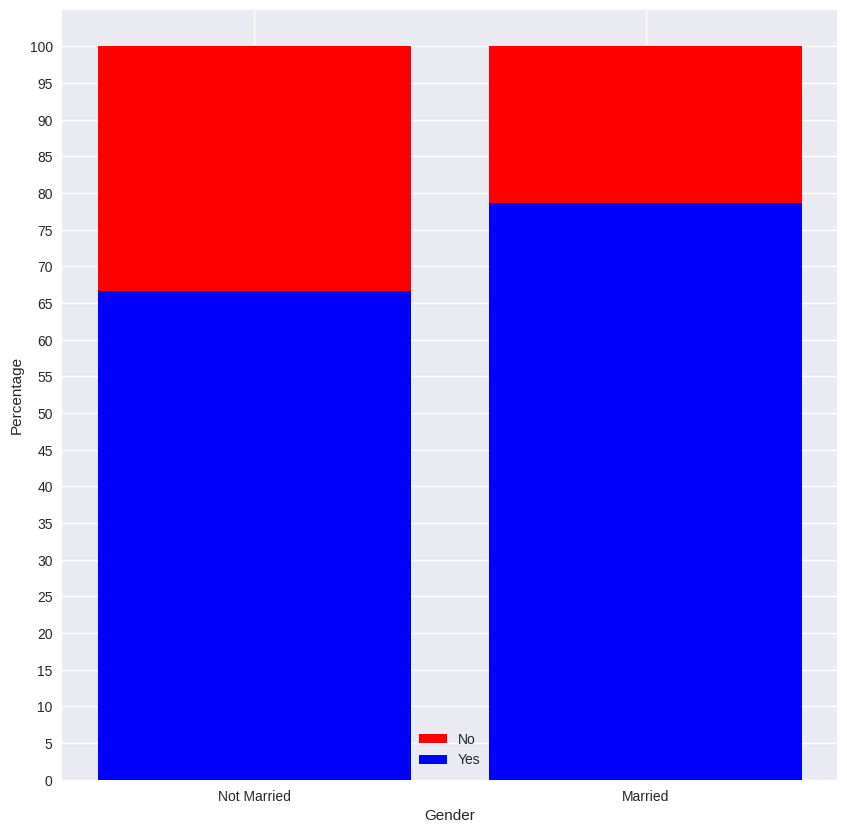

In [ ]:
m = pd.DataFrame(df[['Married','Loan_Status']].value_counts()).reset_index()
m = m.sort_values('Married')
m['per'] = [m.iloc[0,2]/(m.iloc[0,2]+m.iloc[1,2])*100, m.iloc[1,2]/(m.iloc[0,2]+m.iloc[1,2])*100, m.iloc[2,2]/(m.iloc[2,2]+m.iloc[3,2])*100,m.iloc[3,2]/(m.iloc[2,2]+m.iloc[3,2])*100]
x = ['Not Married','Married']
yy = [m.iloc[0,3],m.iloc[2,3]]
yn = [m.iloc[1,3],m.iloc[3,3]]
plt.figure(figsize=(10,10))
plt.bar(x, yn, label = 'No', color = 'r', bottom = yy)
plt.bar(x, yy, label = 'Yes', color = 'b')
plt.yticks(np.arange(0,105,5))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend()
plt.show()

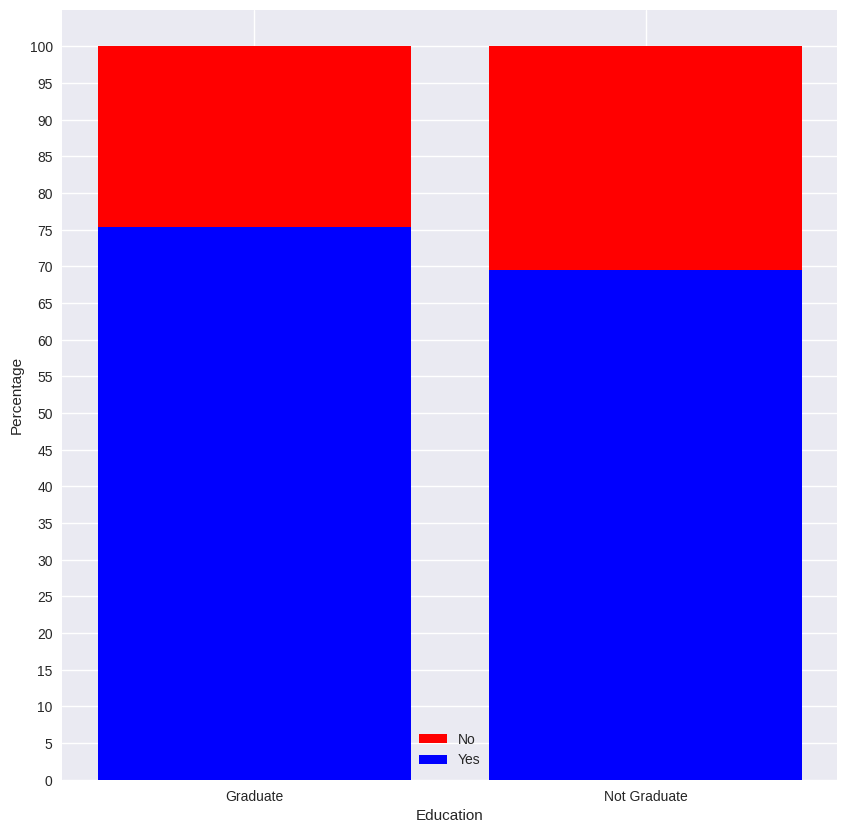

In [ ]:
e = pd.DataFrame(df[['Education','Loan_Status']].value_counts()).reset_index()
e['per'] = [e.iloc[0,2]/(e.iloc[0,2]+e.iloc[1,2])*100, e.iloc[1,2]/(e.iloc[0,2]+e.iloc[1,2])*100, e.iloc[2,2]/(e.iloc[2,2]+e.iloc[3,2])*100,e.iloc[3,2]/(e.iloc[2,2]+e.iloc[3,2])*100]
x = ['Graduate','Not Graduate']
yy = [e.iloc[0,3],e.iloc[2,3]]
yn = [e.iloc[1,3],e.iloc[3,3]]
plt.figure(figsize=(10,10))
plt.bar(x, yn, label = 'No', color = 'r', bottom = yy)
plt.bar(x, yy, label = 'Yes', color = 'b')
plt.yticks(np.arange(0,105,5))
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.legend()
plt.show()

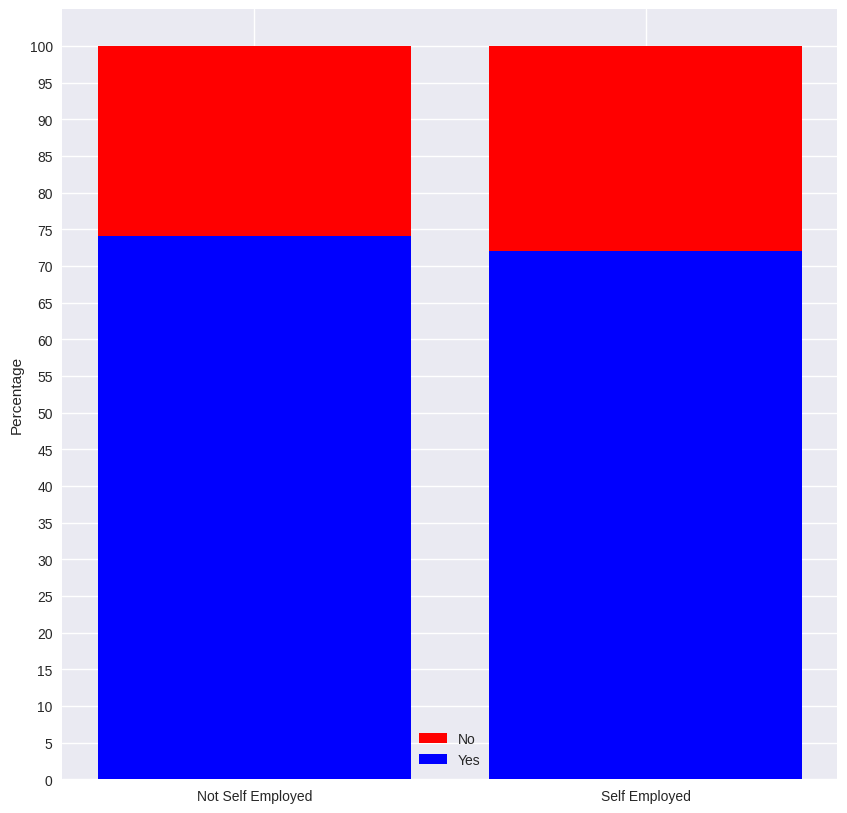

In [ ]:
s = pd.DataFrame(df[['Self_Employed','Loan_Status']].value_counts()).reset_index()
s['per'] = [s.iloc[0,2]/(s.iloc[0,2]+s.iloc[1,2])*100, s.iloc[1,2]/(s.iloc[0,2]+s.iloc[1,2])*100, s.iloc[2,2]/(s.iloc[2,2]+s.iloc[3,2])*100,s.iloc[3,2]/(s.iloc[2,2]+s.iloc[3,2])*100]
x = ['Not Self Employed','Self Employed']
yy = [s.iloc[0,3],s.iloc[2,3]]
yn = [s.iloc[1,3],s.iloc[3,3]]
plt.figure(figsize=(10,10))
plt.bar(x, yn, label = 'No', color = 'r', bottom = yy)
plt.bar(x, yy, label = 'Yes', color = 'b')
plt.yticks(np.arange(0,105,5))
plt.ylabel('Employment')
plt.ylabel('Percentage')
plt.legend()
plt.show()

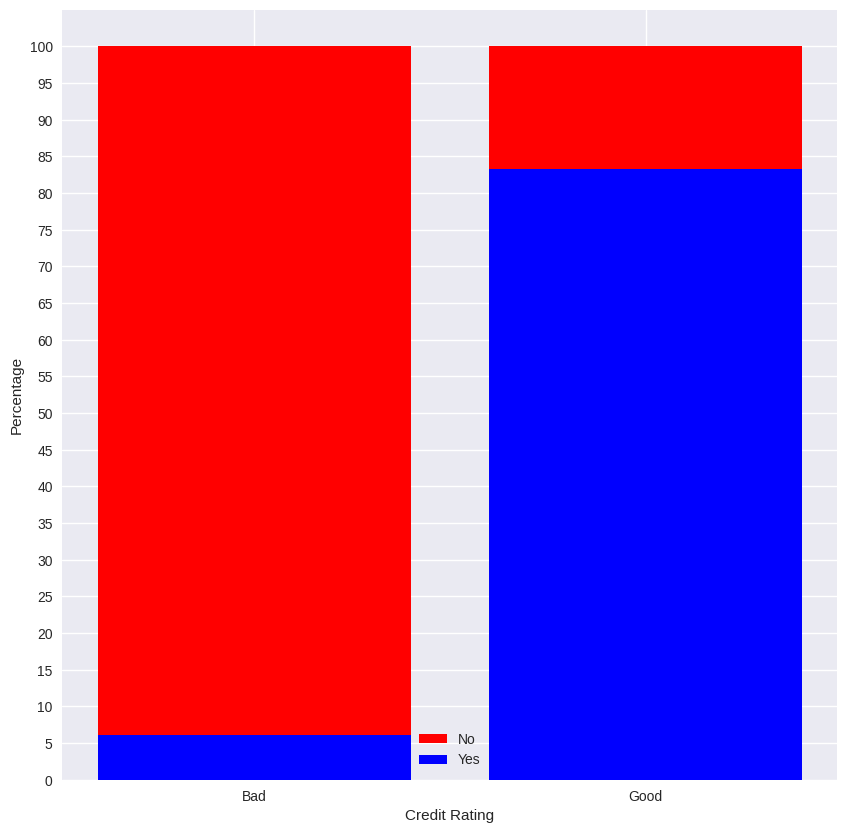

In [ ]:
c = pd.DataFrame(df[['Credit_History','Loan_Status']].value_counts()).reset_index()
c['per'] = [c.iloc[0,2]/(c.iloc[0,2]+c.iloc[1,2])*100, c.iloc[1,2]/(c.iloc[0,2]+c.iloc[1,2])*100, c.iloc[2,2]/(c.iloc[2,2]+c.iloc[3,2])*100,c.iloc[3,2]/(c.iloc[2,2]+c.iloc[3,2])*100]
c = c.sort_values(['Credit_History','Loan_Status'])
x = ['Bad','Good']
yy = [c.iloc[1,3],c.iloc[3,3]]
yn = [c.iloc[0,3],c.iloc[2,3]]
plt.figure(figsize=(10,10))
plt.bar(x, yn, label = 'No', color = 'r', bottom = yy)
plt.bar(x, yy, label = 'Yes', color = 'b')
plt.yticks(np.arange(0,105,5))
plt.xlabel('Credit Rating')
plt.ylabel('Percentage')
plt.legend()
plt.show()

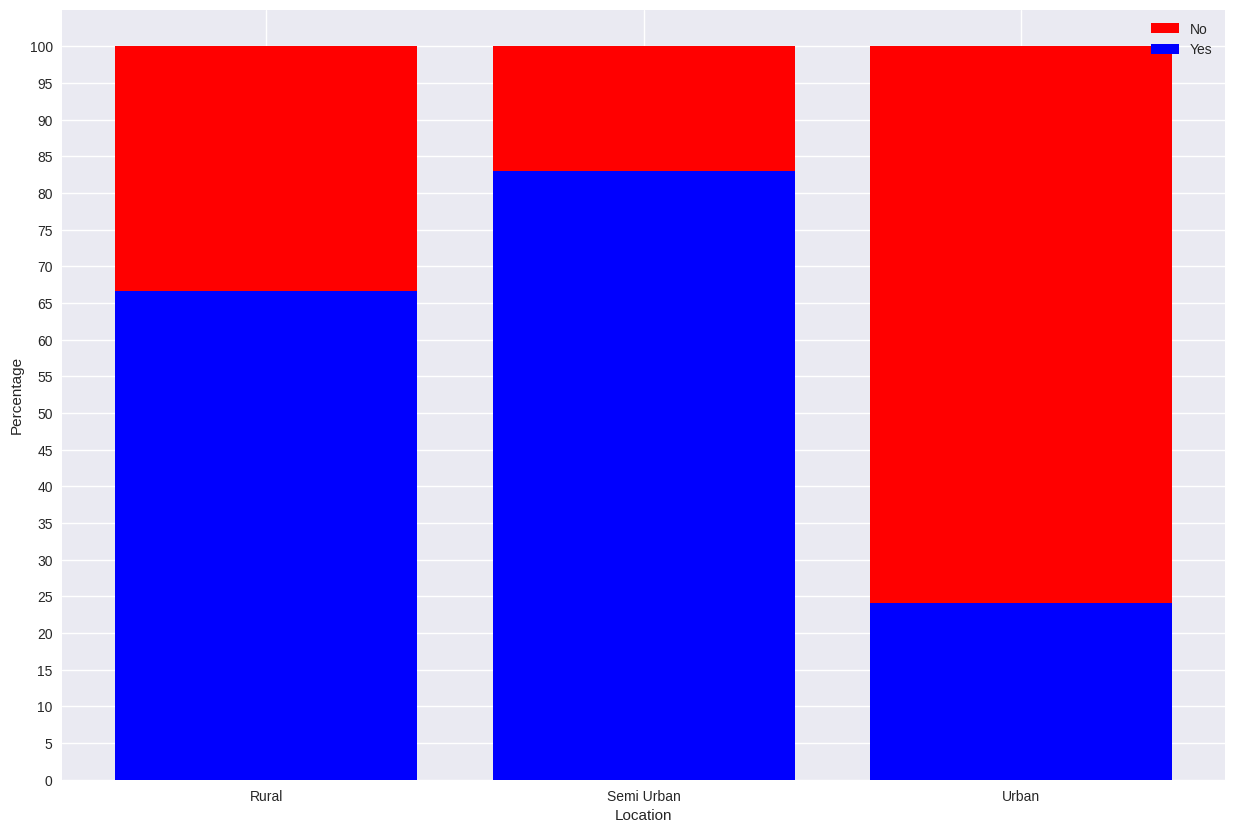

In [ ]:
p = pd.DataFrame(df[['Property_Area','Loan_Status']].value_counts()).reset_index()
p = p.sort_values('Property_Area')
p['per'] = [p.iloc[0,2]/(p.iloc[0,2]+p.iloc[1,2])*100, p.iloc[1,2]/(p.iloc[0,2]+p.iloc[1,2])*100, p.iloc[2,2]/(p.iloc[2,2]+p.iloc[3,2])*100,p.iloc[3,2]/(p.iloc[2,2]+p.iloc[3,2])*100, p.iloc[3,2]/(p.iloc[3,2]+p.iloc[4,2])*100,p.iloc[4,2]/(p.iloc[3,2]+p.iloc[4,2])*100]
x = ['Rural','Semi Urban', 'Urban']
yy = [p.iloc[0,3],p.iloc[2,3],p.iloc[4,3]]
yn = [p.iloc[1,3],p.iloc[3,3],p.iloc[5,3]]
plt.figure(figsize=(15,10))
plt.bar(x, yn, label = 'No', color = 'r', bottom = yy)
plt.bar(x, yy, label = 'Yes', color = 'b')
plt.yticks(np.arange(0,105,5))
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.legend()
plt.show()

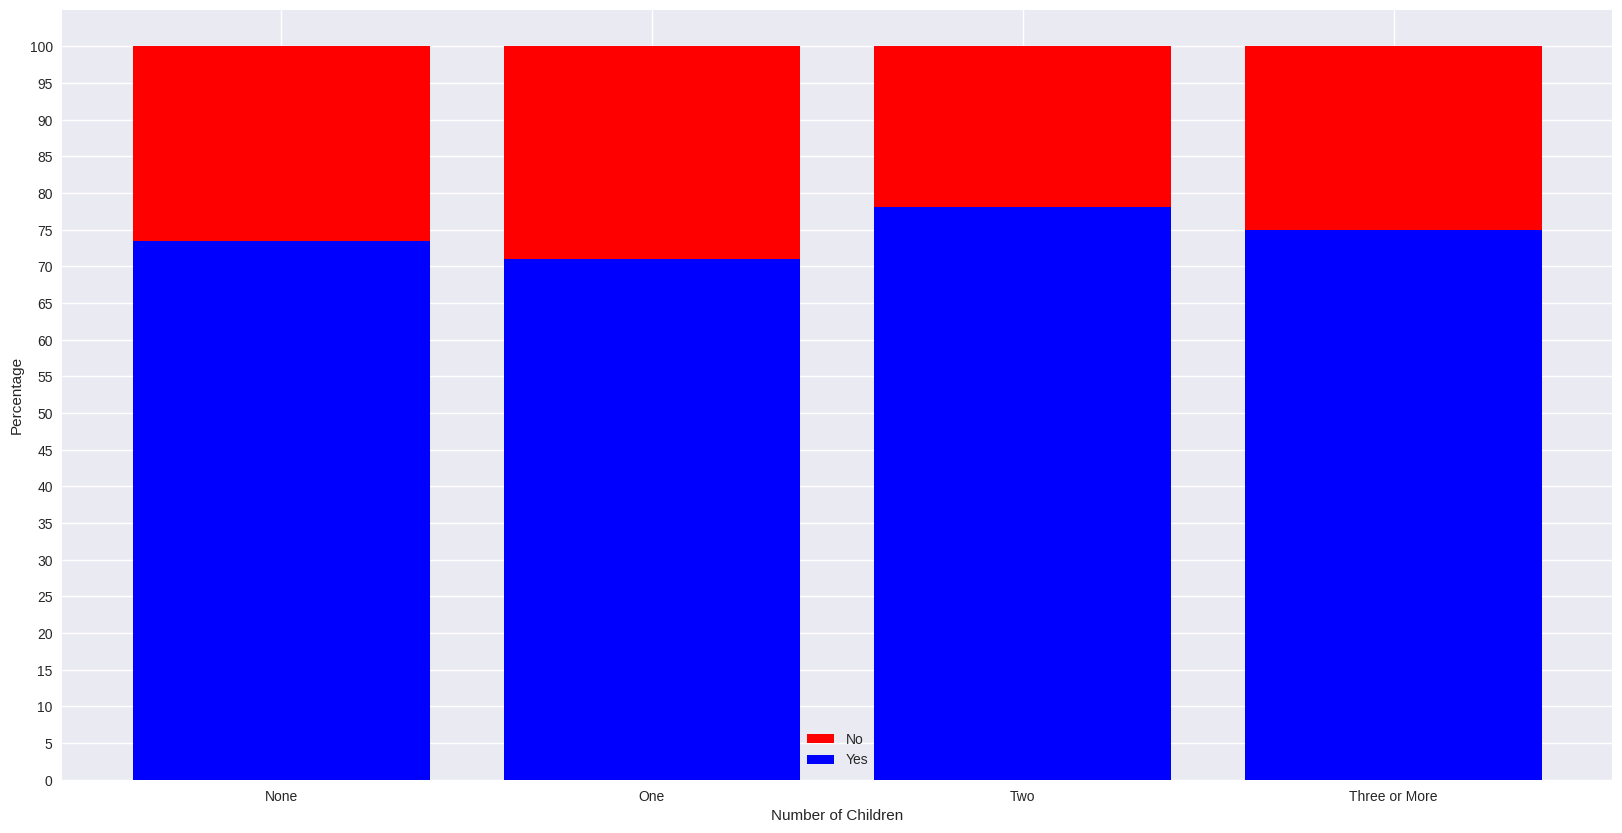

In [ ]:
d = pd.DataFrame(df[['Dependents','Loan_Status']].value_counts()).reset_index()
d = d.sort_values('Dependents')
d['per'] = [d.iloc[0,2]/(d.iloc[0,2]+d.iloc[1,2])*100, d.iloc[1,2]/(d.iloc[0,2]+d.iloc[1,2])*100, d.iloc[2,2]/(d.iloc[2,2]+d.iloc[3,2])*100,d.iloc[3,2]/(d.iloc[2,2]+d.iloc[3,2])*100, d.iloc[4,2]/(d.iloc[4,2]+d.iloc[5,2])*100,d.iloc[5,2]/(d.iloc[4,2]+d.iloc[5,2])*100, d.iloc[6,2]/(d.iloc[6,2]+d.iloc[7,2])*100,d.iloc[7,2]/(d.iloc[6,2]+d.iloc[7,2])*100]
x = ['None','One', 'Two', 'Three or More']
yy = [d.iloc[0,3],d.iloc[2,3],d.iloc[4,3],d.iloc[6,3]]
yn = [d.iloc[1,3],d.iloc[3,3],d.iloc[5,3],d.iloc[7,3]]
plt.figure(figsize=(20,10))

plt.bar(x, yn, label = 'No', color = 'r', bottom = yy)
plt.bar(x, yy, label = 'Yes', color = 'b')
plt.yticks(np.arange(0,105,5))
plt.xlabel('Number of Children')
plt.ylabel('Percentage')
plt.legend()
plt.show()

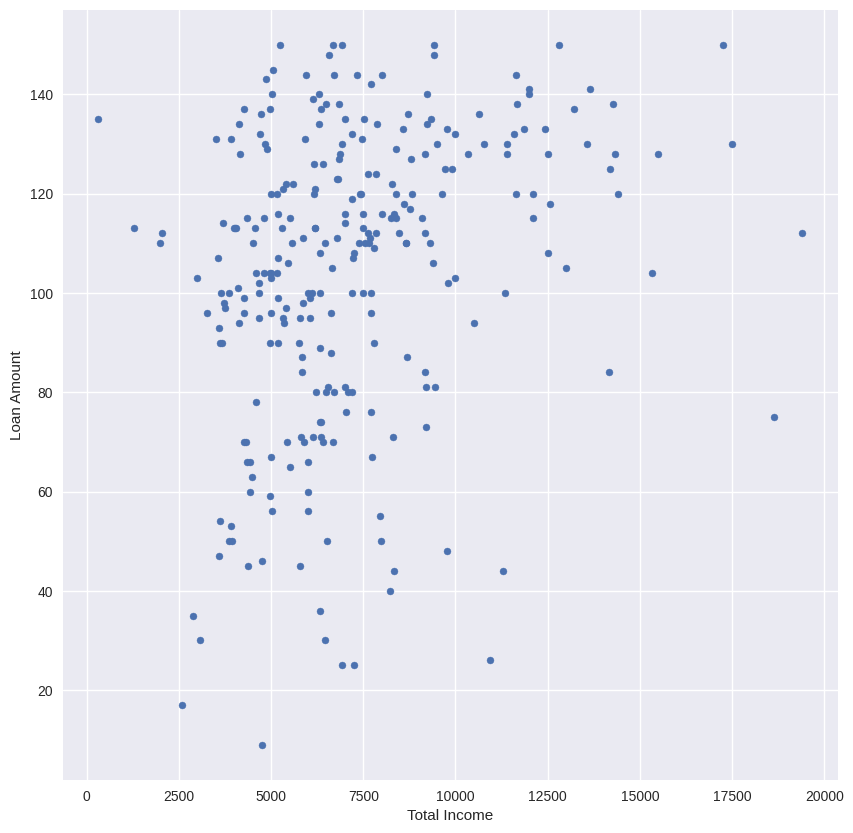

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['Total_Income'],df['LoanAmount'] , s = 25)
#plt.yticks(np.arange(0,105,5))
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

In [ ]:
ndf = df[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Total_Income']]
ndfc = ndf.corr()
ndfc

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
Dependents,1.000000,0.171693,-0.059101,0.096968,-0.113006,-0.007052,0.171693
ApplicantIncome,0.171693,1.000000,-0.237210,0.272357,-0.110775,0.051056,1.000000
CoapplicantIncome,-0.059101,-0.237210,1.000000,0.111969,-0.007340,0.008851,-0.237210
LoanAmount,0.096968,0.272357,0.111969,1.000000,0.119206,0.021411,0.272357
Loan_Amount_Term,-0.113006,-0.110775,-0.007340,0.119206,1.000000,0.020643,-0.110775
Credit_History,-0.007052,0.051056,0.008851,0.021411,0.020643,1.000000,0.051056
Total_Income,0.171693,1.000000,-0.237210,0.272357,-0.110775,0.051056,1.000000


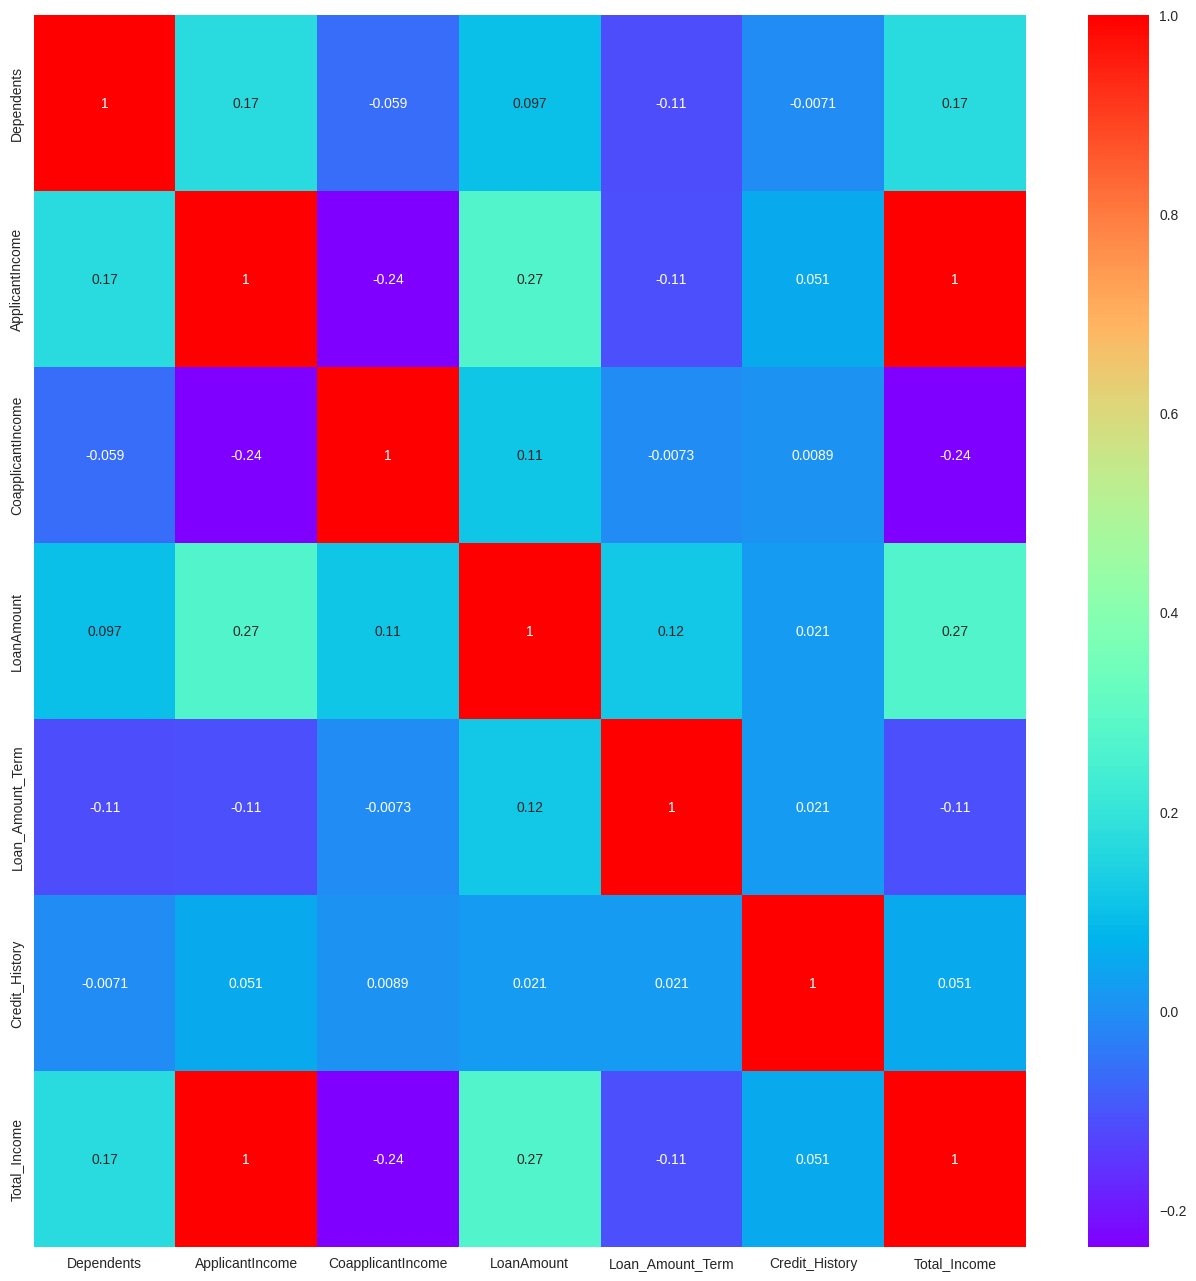

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(ndfc,cmap='rainbow',annot=True)
plt.show()

**Linear Regression**

In [ ]:
x = ndf[['Total_Income']]
y = ndf['LoanAmount']
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True,random_state= 42)
lm = LinearRegression()
lm.fit(xtrain, ytrain)
ypred = lm.predict(xtest)
print('R2 Score', lm.score(xtest,ytest))
print('MAE', sum(ypred-ytest))
print('Cross Val',np.mean(cross_val_score(lm,x,y,scoring = 'r2',cv = 10)))

R2 Score -0.0013759840380265231
MAE 155.69776971377604
Cross Val 0.042129559544402964


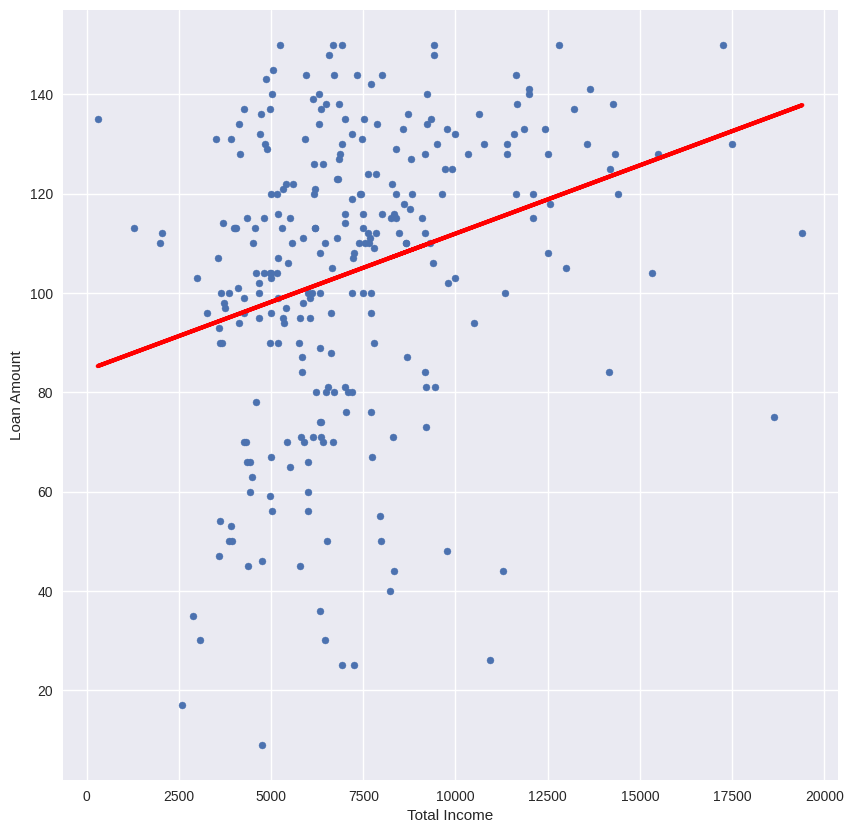

In [ ]:
y = lm.coef_*x + lm.intercept_
plt.figure(figsize=(10,10))
plt.scatter(df['Total_Income'],df['LoanAmount'] , s = 25)
plt.plot(x,y , linewidth = 3, color = 'red')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

In [ ]:
x = ndf[['Dependents','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Total_Income']]
y = ndf['LoanAmount']
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True, random_state= 42)
lm = LinearRegression()
lm.fit(xtrain, ytrain)
ypred = lm.predict(xtest)
print('R2 Score', lm.score(xtest,ytest))
print('MAE', sum(ypred-ytest))
print('Cross Val',np.mean(cross_val_score(lm,x,y,scoring = 'r2',cv = 10)))

R2 Score 0.07835687884413756
MAE 112.39357289790723
Cross Val 0.046199014131535265


In [ ]:
lm.coef_

array([ 1.56968526e+00,  1.29599247e-03,  1.97996030e-03,  8.22096616e-02,
       -2.70448760e-01,  2.59198493e-03])

In [ ]:
lm.intercept_

47.72676953760545

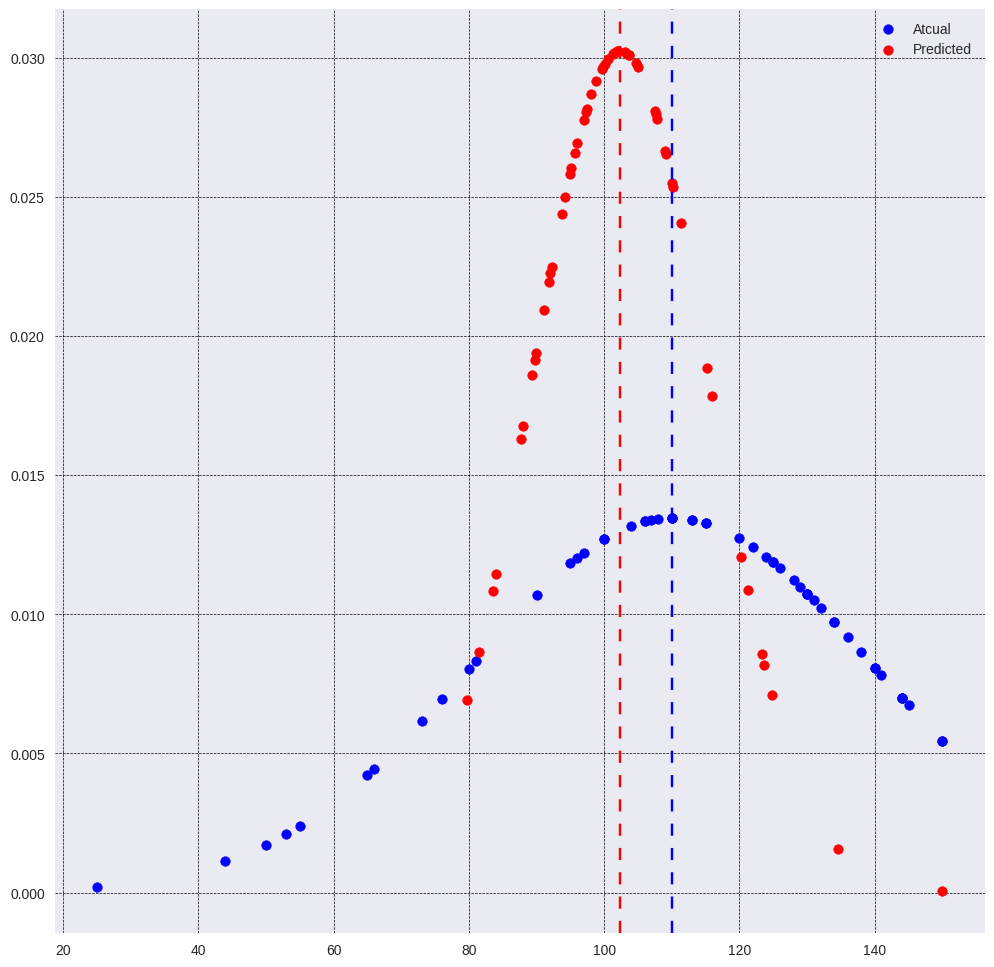

In [ ]:
yt = norm.pdf(ytest, loc = np.mean(ytest), scale = np.std(ytest))
yp = norm.pdf(ypred, loc = np.mean(ypred), scale = np.std(ypred))
plt.figure(figsize = (12,12))
plt.scatter(ytest, yt, color = 'b', label = 'Atcual')
plt.scatter(ypred, yp, color = 'r', label = 'Predicted')
plt.axvline(x = np.mean(ypred), color="r", linestyle=(0, (5, 5)))
plt.axvline(x = np.mean(ytest), color="b", linestyle=(0, (5, 5)))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

**General Linear Model**

In [ ]:
a = np.arange(0.01,10.01,0.01)
p = np.arange(0,4,1)
m = np.arange(1000,1001,1)
parameters = {'power':[0,2,3],'alpha':a,'max_iter':m}

In [ ]:
tr = TweedieRegressor(random_state= 42)
gtr = GridSearchCV(estimator = tr, param_grid = parameters, scoring='r2', cv=5,return_train_score=True)
gtr.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


GridSearchCV(cv=5, estimator=TweedieRegressor(),
             param_grid={'alpha': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0...
        9.46,  9.47,  9.48,  9.49,  9.5 ,  9.51,  9.52,  9.53,  9.54,
        9.55,  9.56,  9.57,  9.58,  9.59,  9.6 ,  9.61,  9.62,  9.63,
        9.64,  9.65,  9.66,  9.67,  9.68,  9.69,  9.7 ,  9.71,  9.72,
        9.73,  9.74,  9.75,  9.76,  9.77,  9.78,  9.79,  9.8 ,  9.81,
        9.82,  9.83,  9.84,  9.85,  9.86,  9.87,  9.88,  9.89,  9.9 ,
        9.91,  9.92,  9.93,  9.94,  9.95,  9.96,  9.97,  9.98,  9.99,
       10.  ]),
                         'max_iter': array([1000]), 'power': [0, 2, 3]},
             return_train_score=True, scoring='r2')

In [ ]:
gtr.best_params_

{'alpha': 0.39, 'max_iter': 1000, 'power': 0}

In [ ]:
tr = TweedieRegressor(power = gtr.best_params_['power'] , alpha = gtr.best_params_['alpha'],max_iter = gtr.best_params_['max_iter'])
tr.fit(xtrain,ytrain)
ypred = tr.predict(xtest)
print('R2 Score', tr.score(xtest,ytest))
print('MAE', sum(ypred-ytest))
print('Cross Val',np.mean(cross_val_score(tr,x,y,scoring = 'r2',cv = 10)))

R2 Score 0.07891640694217683
MAE 112.60646404065974
Cross Val 0.04666114229373179


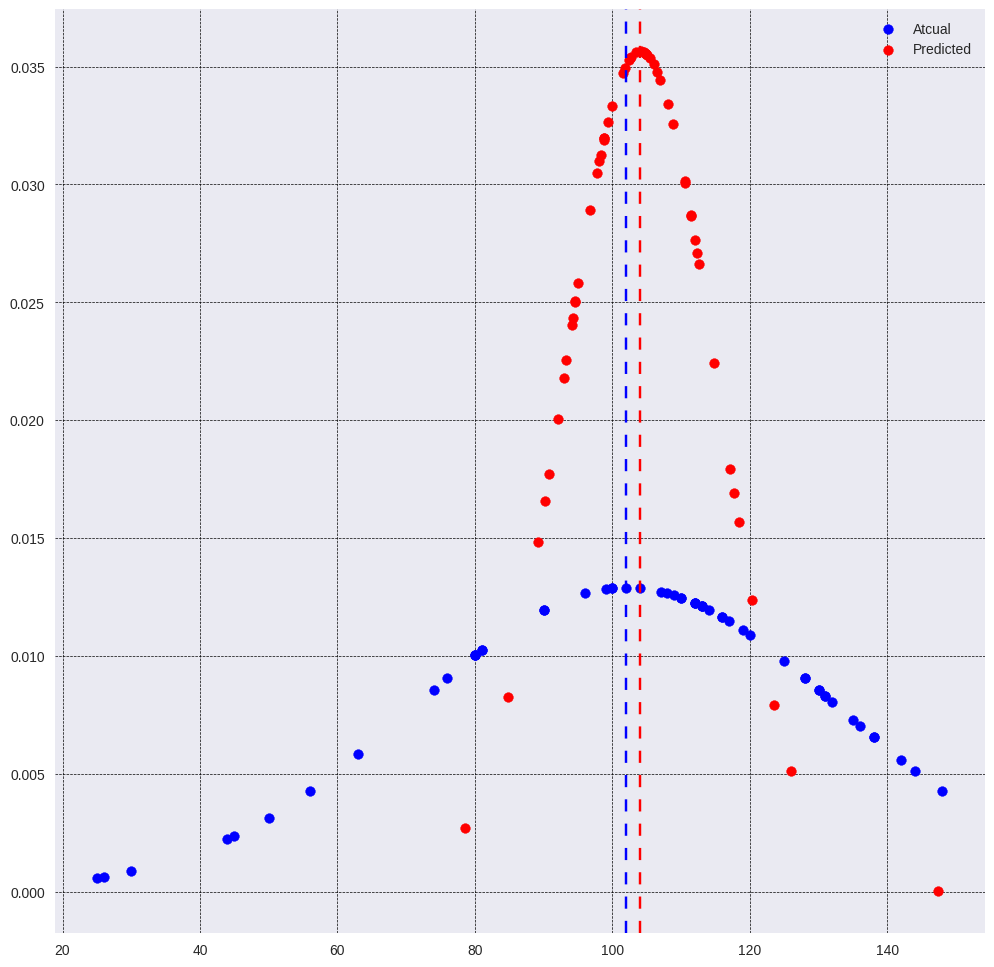

In [ ]:
yt = norm.pdf(ytest, loc = np.mean(ytest), scale = np.std(ytest))
yp = norm.pdf(ypred, loc = np.mean(ypred), scale = np.std(ypred))
plt.figure(figsize = (12,12))
plt.scatter(ytest, yt, color = 'b', label = 'Atcual')
plt.scatter(ypred, yp, color = 'r', label = 'Predicted')
plt.axvline(x = np.mean(ypred), color="r", linestyle=(0, (5, 5)))
plt.axvline(x = np.mean(ytest), color="b", linestyle=(0, (5, 5)))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

**Ridge Regression**

In [ ]:
p = np.arange(0.0001, 0.0011,0.0001)
q = np.arange(0.002, 0.011,0.001)
r = np.arange(0.02, 0.11,0.01)
t = np.arange(0.2, 1.1,0.1)
u = np.arange(2, 11,1)
v = np.arange(20, 110,10)
w = np.arange(200, 1100,100)
a = np.concatenate((p,q,r,t,u,v,w))
parameters = {'alpha':a}

In [ ]:
x = ndf[['Dependents','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History',]]
y = ndf['LoanAmount']
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)
rr = Ridge()
gs = GridSearchCV(estimator = rr, param_grid = parameters, scoring='r2', cv=5,return_train_score=True)
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04,
       9.e-04, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03,
       8.e-03, 9.e-03, 1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02,
       7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01,
       6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 4.e+00,
       5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00, 1.e+01, 2.e+01, 3.e+01,
       4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01, 1.e+02, 2.e+02,
       3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02, 1.e+03])},
             return_train_score=True, scoring='r2')

In [ ]:
gs.best_params_

{'alpha': 200.0}

In [ ]:
a = gs.best_params_['alpha']
rr =Ridge(alpha = a)
rr.fit(xtrain,ytrain)
ypred = rr.predict(xtest)
print('R2 score', r2_score(ytest,ypred))
print('MAE', sum(ypred-ytest))
print('Cross Val',np.mean(cross_val_score(rr,x,y,scoring = 'r2',cv = 10)))

R2 score 0.0015397552162125239
MAE -89.14339108513283
Cross Val 0.051349497885595376


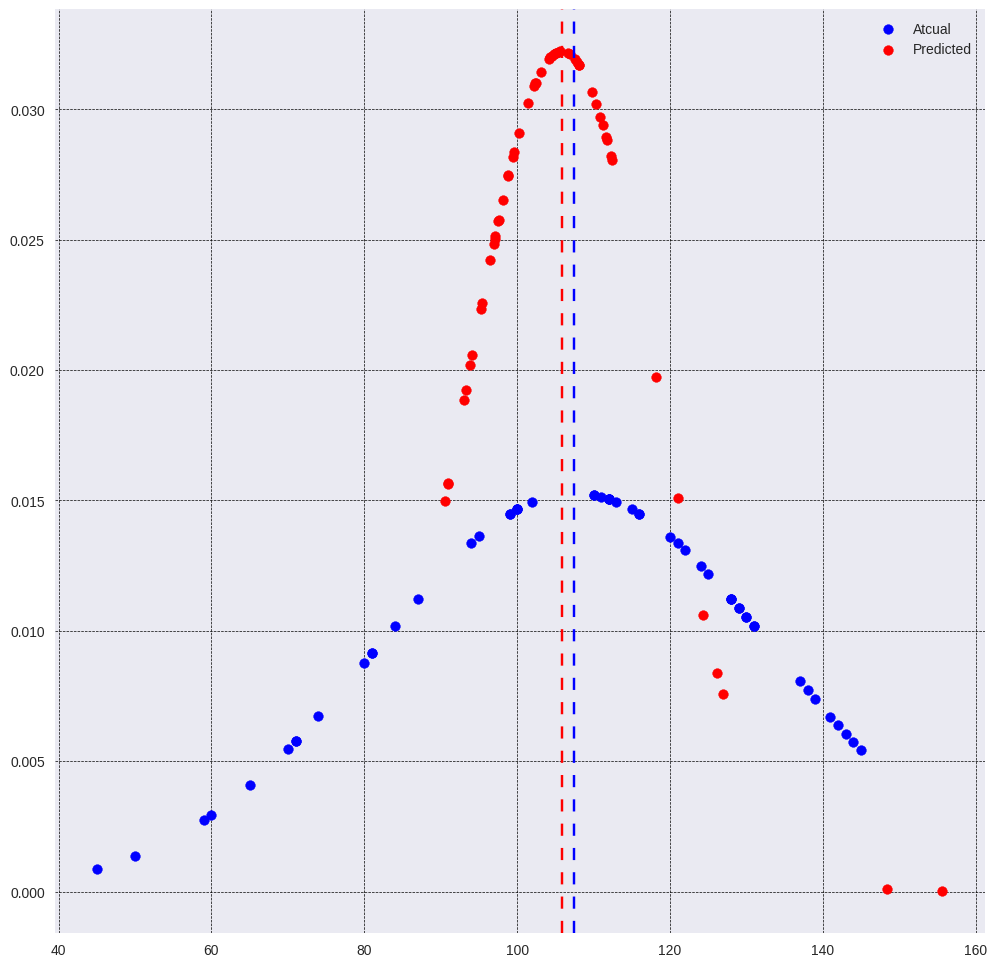

In [ ]:
yt = norm.pdf(ytest, loc = np.mean(ytest), scale = np.std(ytest))
yp = norm.pdf(ypred, loc = np.mean(ypred), scale = np.std(ypred))
plt.figure(figsize = (12,12))
plt.scatter(ytest, yt, color = 'b', label = 'Atcual')
plt.scatter(ypred, yp, color = 'r', label = 'Predicted')
plt.axvline(x = np.mean(ypred), color="r", linestyle=(0, (5, 5)))
plt.axvline(x = np.mean(ytest), color="b", linestyle=(0, (5, 5)))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

**Lasso Regression**

In [ ]:
x = ndf[['Dependents','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History',]]
y = ndf['LoanAmount']
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)
ls= Lasso()
lgs = GridSearchCV(estimator = ls, param_grid = parameters, scoring='r2', cv=5,return_train_score=True)
lgs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04,
       9.e-04, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03,
       8.e-03, 9.e-03, 1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02,
       7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01,
       6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 4.e+00,
       5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00, 1.e+01, 2.e+01, 3.e+01,
       4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01, 1.e+02, 2.e+02,
       3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02, 1.e+03])},
             return_train_score=True, scoring='r2')

In [ ]:
lgs.best_params_['alpha']

30.0

In [ ]:
a = lgs.best_params_['alpha']
ls =Lasso(alpha = a)
ls.fit(xtrain,ytrain)
ypred = ls.predict(xtest)
print('R2 score', r2_score(ytest,ypred))
print('MAE', sum(ypred-ytest))
print('Cross Val',np.mean(cross_val_score(ls,x,y,scoring = 'r2',cv = 10)))

R2 score 0.15701094332530785
MAE 209.66158482246257
Cross Val 0.05037744161878399


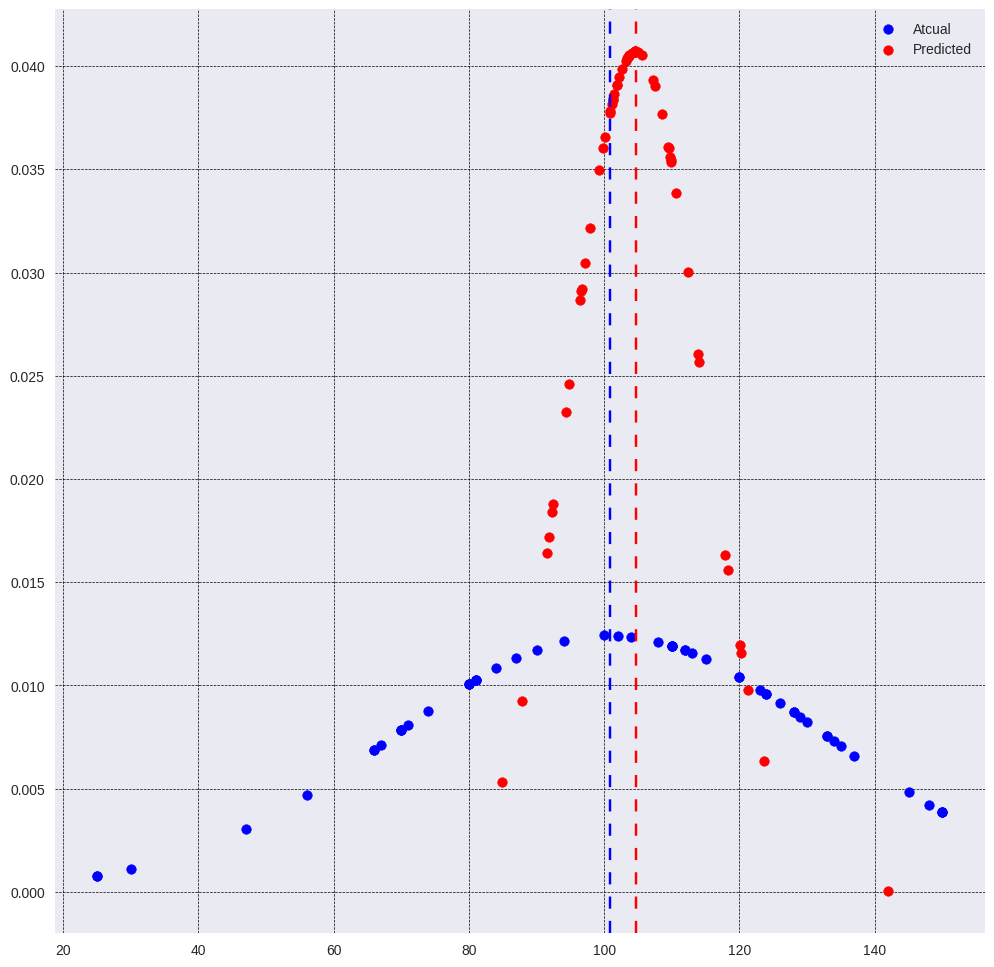

In [ ]:
yt = norm.pdf(ytest, loc = np.mean(ytest), scale = np.std(ytest))
yp = norm.pdf(ypred, loc = np.mean(ypred), scale = np.std(ypred))
plt.figure(figsize = (12,12))
plt.scatter(ytest, yt, color = 'b', label = 'Atcual')
plt.scatter(ypred, yp, color = 'r', label = 'Predicted')
plt.axvline(x = np.mean(ypred), color="r", linestyle=(0, (5, 5)))
plt.axvline(x = np.mean(ytest), color="b", linestyle=(0, (5, 5)))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

**Desicion Tree**

In [ ]:
ndfx = df[['Gender','Married', 'Self_Employed','Property_Area','Credit_History']]
ndfy = df['Loan_Status']
oc = OrdinalEncoder()
oc.fit(ndfx)
x = oc.transform(ndfx)
lb = LabelEncoder()
lb.fit(ndfy)
y = lb.transform(ndfy)
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, random_state= 42 ,shuffle = True)

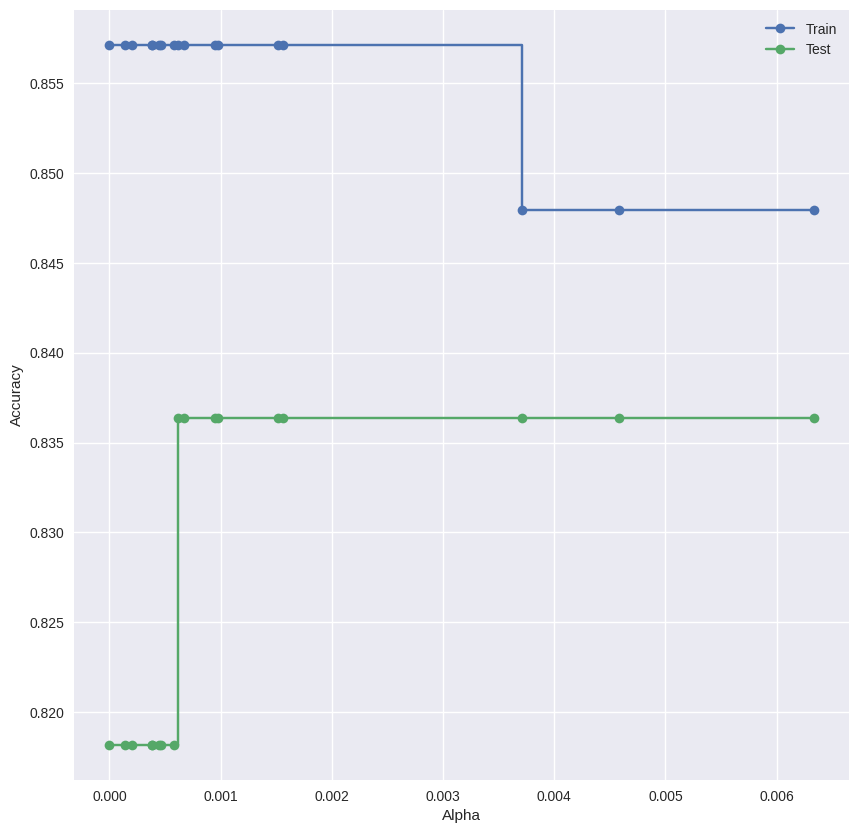

In [ ]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
daas =[]
for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    daa.fit(xtrain, ytrain)
    daas.append(daa)
trs = [daa.score(xtrain, ytrain) for daa in daas]
tts = [daa.score(xtest, ytest) for daa in daas]
fig, ax =plt.subplots(figsize = (10,10))
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, trs,marker ='o', drawstyle="steps-post", label = 'Train')
ax.plot(ccp_alphas, tts,marker ='o', drawstyle="steps-post", label = 'Test')
ax.legend()
plt.show()

<Axes: xlabel='Alpha'>

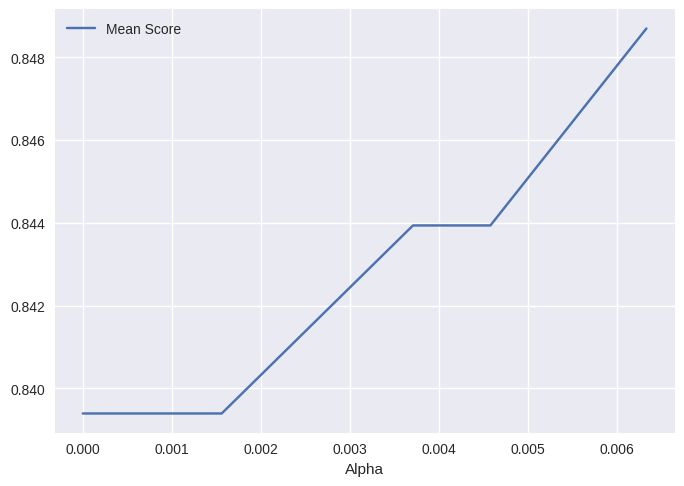

In [ ]:
alv = []
for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(daa, xtrain , ytrain, cv = 10)
    alv.append([ccp_alpha,np.mean(scores),np.std(scores)])
adf = pd.DataFrame(data = alv, columns = ['Alpha', 'Mean Score', 'Std Score'])
adf.plot(x = 'Alpha', y = 'Mean Score')

In [ ]:
aq = adf.sort_values('Mean Score', ascending = False)
c = aq.iloc[0,0]
c

0.006335808991808217

In [ ]:
t = np.arange(1,16,1)
parameters = {'max_depth':t,'ccp_alpha':[c]}
clf = DecisionTreeClassifier()
cgs = GridSearchCV(estimator = clf, param_grid = parameters, scoring='accuracy', cv=5,return_train_score=True)
cgs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.006335808991808217],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             return_train_score=True, scoring='accuracy')

In [ ]:
cgs.best_params_

{'ccp_alpha': 0.006335808991808217, 'max_depth': 1}

In [ ]:
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)
clf = DecisionTreeClassifier(max_depth = cgs.best_params_['max_depth'],ccp_alpha = cgs.best_params_['ccp_alpha'] )
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print('Diff' ,sum(ypred - ytest))
print('Score' ,clf.score(xtest, ytest))
print('Cross Val',np.mean(cross_val_score(clf,x,y,scoring = 'accuracy',cv = 10)))

Diff 4
Score 0.9272727272727272
Cross Val 0.8457671957671957


[Text(0.5, 0.75, 'Credit_History <= 0.5\ngini = 0.4\nsamples = 217\nvalue = [60, 157]\nclass = Yes'),
 Text(0.25, 0.25, 'gini = 0.142\nsamples = 26\nvalue = [24, 2]\nclass = No'),
 Text(0.75, 0.25, 'gini = 0.306\nsamples = 191\nvalue = [36, 155]\nclass = Yes')]

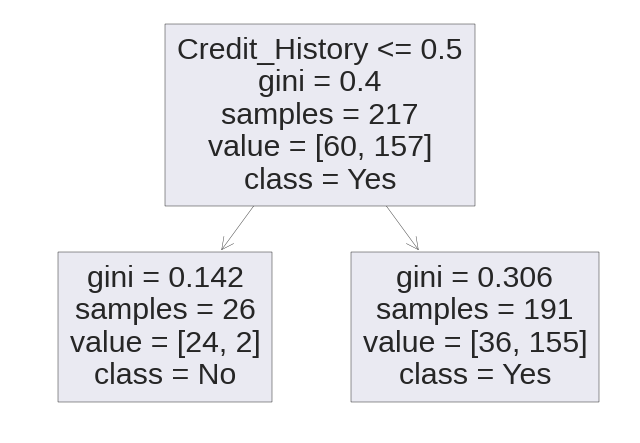

In [ ]:
plot_tree(clf,feature_names = ['Gender','Married', 'Self_Employed','Property_Area','Credit_History'],class_names= ['No','Yes'])

**Bagging Classifier**

In [ ]:

t = np.arange(1,51,1)
clf = DecisionTreeClassifier()
parameters = {'n_estimators':t}
bc = BaggingClassifier()
bcg = GridSearchCV(estimator = bc, param_grid = parameters, scoring='accuracy', cv=5,return_train_score=True)
bcg.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True, scoring='accuracy')

In [ ]:
bcg.best_params_

{'n_estimators': 1}

**Gradient Boosting**

In [ ]:
t = np.arange(0.01,1.01,0.01)
c = np.arange(0.0001,0.001,0.0001)
n = np.arange(100,201,1)
parameters = {'learning_rate':c,'n_estimators':n}
ndfy = df['Loan_Status']
oc = LabelEncoder()
oc.fit(ndfy)
y = oc.transform(ndfy)
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)

In [ ]:
gbc = GradientBoostingClassifier()
ggbc = GridSearchCV(estimator = gbc, param_grid = parameters, scoring='accuracy', cv=5,return_train_score=True)
ggbc.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200])},
             return_train_score=True, scoring='accuracy')

In [ ]:
ggbc.best_params_

{'learning_rate': 0.0001, 'n_estimators': 100}

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = ggbc.best_params_['learning_rate'],n_estimators = ggbc.best_params_['n_estimators'])
gbc.fit(xtrain,ytrain)
print('Score' ,gbc.score(xtest, ytest))
print('Cross Val',np.mean(cross_val_score(gbc,x,y,scoring = 'accuracy',cv = 10)))

Score 0.7818181818181819
Cross Val 0.7390211640211639


**Logistic Regression**

In [ ]:
ndfx = df[['Gender','Married', 'Self_Employed','Property_Area','Credit_History']]
ndfy = df['Loan_Status']
oc = OrdinalEncoder()
oc.fit(ndfx)
xa = oc.transform(ndfx)
lb = LabelEncoder()
lb.fit(ndfy)
y = lb.transform(ndfy)
m = MinMaxScaler()
m.fit(xa)
x = m.transform(xa)

In [ ]:
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)
pipe = make_pipeline(OrdinalEncoder(),StandardScaler(), LogisticRegression())
pipe.fit(xtrain,ytrain)
print('Score' ,pipe.score(xtest,ytest))
print('Cross Val',np.mean(cross_val_score(pipe,x,y,scoring = 'accuracy',cv = 10)))

Score 0.8545454545454545
Cross Val 0.8457671957671957


In [ ]:
set_config(display='diagram')
pipe

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pkl_file = 'logisitic.pkl'
with open(pkl_file, "wb") as fp:
    pickle.dump(pipe, fp)

In [ ]:
ndfx.dtypes

Gender             object
Married            object
Self_Employed      object
Property_Area      object
Credit_History    float64
dtype: object

**Random Forest**

In [ ]:
t = np.arange(1,6,1)
c = np.arange(0.001,0.101,0.001)
n = np.arange(0,151,1)
parameters = {'n_estimators':n,'max_depth':t}
ndfx = df[['Gender','Married', 'Self_Employed','Property_Area','Credit_History']]
ndfy = df['Loan_Status']
oc = OrdinalEncoder()
oc.fit(ndfx)
x = oc.transform(ndfx)
le = LabelEncoder()
le.fit(ndfy)
y = le.transform(ndfy)
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)

In [ ]:
rf = RandomForestClassifier()
grf = GridSearchCV(estimator = rf, param_grid = parameters, scoring='accuracy', cv=5,return_train_score=True)
grf.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 3775.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150])},
             return_train_score=True, scoring='accuracy')

In [ ]:
grf.best_params_

{'max_depth': 4, 'n_estimators': 25}

In [ ]:
rf = RandomForestClassifier(max_depth= grf.best_params_['max_depth'], n_estimators= grf.best_params_['n_estimators'])
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

0.8545454545454545

In [ ]:
t = np.arange(1,6,1)
c = np.arange(0.001,1.001,0.001)
n = np.arange(0,1001,1)
parameters = {'iterations':n,'learning_rate':c}
ndfx = df[['Gender','Married', 'Self_Employed','Property_Area','Credit_History']]
ndfy = df['Loan_Status']
oc = OrdinalEncoder()
oc.fit(ndfx)
x = oc.transform(ndfx)
le = LabelEncoder()
le.fit(ndfy)
y = le.transform(ndfy)
xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)

In [ ]:
cbc = CatBoostClassifier(iterations = 1000, learning_rate = 0.001)
cbc.fit(xtrain,ytrain)
print('Score', cbc.score(xtest,ytest))
print('Cross Val',np.mean(cross_val_score(cbc,x,y,scoring = 'accuracy',cv = 10)))

Streaming output truncated to the last 5000 lines.
1:	learn: 0.6918391	total: 1.61ms	remaining: 805ms
2:	learn: 0.6912367	total: 4.11ms	remaining: 1.36s
3:	learn: 0.6906203	total: 4.58ms	remaining: 1.14s
4:	learn: 0.6899698	total: 5.07ms	remaining: 1.01s
5:	learn: 0.6893518	total: 5.63ms	remaining: 933ms
6:	learn: 0.6887389	total: 6.19ms	remaining: 878ms
7:	learn: 0.6880585	total: 6.86ms	remaining: 851ms
8:	learn: 0.6874581	total: 7.42ms	remaining: 817ms
9:	learn: 0.6867308	total: 8.06ms	remaining: 799ms
10:	learn: 0.6860511	total: 8.59ms	remaining: 773ms
11:	learn: 0.6854048	total: 10.3ms	remaining: 850ms
12:	learn: 0.6847735	total: 10.9ms	remaining: 831ms
13:	learn: 0.6841354	total: 11.5ms	remaining: 811ms
14:	learn: 0.6835461	total: 12.1ms	remaining: 797ms
15:	learn: 0.6828545	total: 12.8ms	remaining: 787ms
16:	learn: 0.6822700	total: 13.4ms	remaining: 774ms
17:	learn: 0.6816370	total: 14ms	remaining: 762ms
18:	learn: 0.6809198	total: 14.6ms	remaining: 756ms
19:	learn: 0.6802972	tot

In [ ]:
ndfx = df[['Gender','Married', 'Self_Employed','Property_Area','Credit_History']]
ndfy = df['Loan_Status']
oc = OrdinalEncoder()
oc.fit(ndfx)
xa = oc.transform(ndfx)
lb = LabelEncoder()
lb.fit(ndfy)
y = lb.transform(ndfy)
m = MinMaxScaler()
m.fit(xa)
x = m.transform(xa)

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(units=32, activation='relu', input_shape=(5,)))
  model.add(Dense(units=16, activation='relu', input_shape=(5,)))
  model.add(Dense(units=8, activation='relu', input_shape=(5,)))
  model.add(Dense(units=4, activation='relu', input_shape=(5,)))
  model.add(Dense(units=2, activation='relu', input_shape=(5,)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

tf.random.set_seed(7)
model = KerasClassifier(model=create_model, verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5]
momentum = np.arange(0.1,1.1,0.1)
epochs =[100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer, epochs=epochs,optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(x,y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.845724 using {'epochs': 100, 'optimizer': 'RMSprop', 'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.7000000000000001}


In [ ]:
param_grid  = {'epochs': [100,50,25,10], 'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.7000000000000001}

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(5,)))
model.add(Dense(units=16, activation='relu', input_shape=(5,)))
model.add(Dense(units=8, activation='relu', input_shape=(5,)))
model.add(Dense(units=4, activation='relu', input_shape=(5,)))
model.add(Dense(units=2, activation='relu', input_shape=(5,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=param_grid['optimizer__learning_rate'],momentum = param_grid['optimizer__momentum']), metrics=['accuracy'])
model.fit(xtrain,ytrain, epochs = param_grid['epochs'])
loss_and_metrics = model.evaluate(xtest, ytest)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

Epoch 1/100
7/7 [==============================] - 2s 7ms/step - loss: 0.6322 - accuracy: 0.7051
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5530 - accuracy: 0.7235
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5269 - accuracy: 0.7235
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5087 - accuracy: 0.7235
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4928 - accuracy: 0.7235
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4869 - accuracy: 0.7235
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4873 - accuracy: 0.8387
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4846 - accuracy: 0.8387
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4811 - accuracy: 0.8341
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.8387
Epoch 11/100
7/7 [===========

2/2 [==============================] - 0s 8ms/step


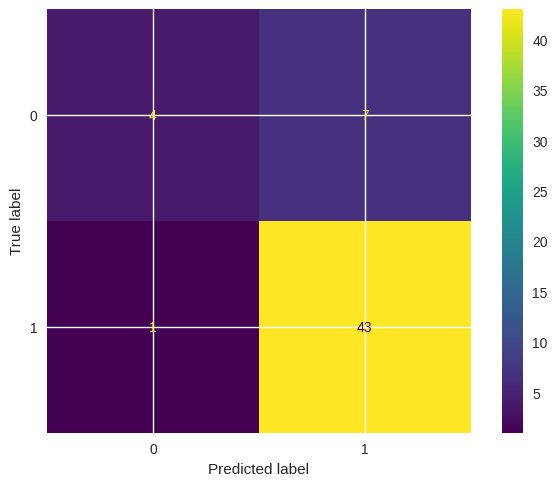

In [ ]:
predicted = model.predict(xtest)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(ytest)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
def model(a,b):
  oc = OrdinalEncoder()
  oc.fit(a)
  x = oc.transform(a)
  le = LabelEncoder()
  le.fit(b)
  y = le.transform(b)
  xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)

  clf = DecisionTreeClassifier()
  path = clf.cost_complexity_pruning_path(xtrain, ytrain)
  ccp_alphas = path.ccp_alphas
  ccp_alphas = ccp_alphas[:-1]
  daas =[]
  for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    daa.fit(xtrain, ytrain)
    daas.append(daa)
  trs = [daa.score(xtrain, ytrain) for daa in daas]
  tts = [daa.score(xtest, ytest) for daa in daas]
  alv = []
  for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(daa, xtrain , ytrain, cv = 10)
    alv.append([ccp_alpha,np.mean(scores),np.std(scores)])
  adf = pd.DataFrame(data = alv, columns = ['Alpha', 'Mean Score', 'Std Score'])
  aq = adf.sort_values('Mean Score', ascending = False)
  c = aq.iloc[0,0]

  t = np.arange(1,16,1)
  parameters = {'max_depth':t,'ccp_alpha':[c]}
  clf = DecisionTreeClassifier()
  cgs = GridSearchCV(estimator = clf, param_grid = parameters, scoring='accuracy', cv=5,return_train_score=True)
  cgs.fit(xtrain,ytrain)
  xtrain, xtest, ytrain,ytest = train_test_split(x, y ,test_size = 0.2, shuffle = True)
  clf = DecisionTreeClassifier(max_depth = cgs.best_params_['max_depth'],ccp_alpha = cgs.best_params_['ccp_alpha'] )
  clf.fit(xtrain,ytrain)
  ypred = clf.predict(xtest)
  clfd = sum(ytest-ypred)
  clfs = clf.score(xtest, ytest)
  clfv = np.mean(cross_val_score(clf,x,y,scoring = 'accuracy',cv = 10))

  pipe = make_pipeline(StandardScaler(), LogisticRegression())
  pipe.fit(xtrain,ytrain)
  ypred = pipe.predict(xtest)
  pipd = sum(ytest-ypred)
  pips = pipe.score(xtest,ytest)
  pipv = np.mean(cross_val_score(pipe,x,y,scoring = 'accuracy',cv = 10))

  c = np.arange(0.0001,0.001,0.0001)
  n = np.arange(100,201,1)
  parameters = {'learning_rate':c,'n_estimators':n}
  gbc = GradientBoostingClassifier()
  ggbc = GridSearchCV(estimator = gbc, param_grid = parameters, scoring='accuracy', cv=5,return_train_score=True)
  ggbc.fit(xtrain,ytrain)
  gbc = GradientBoostingClassifier(learning_rate = ggbc.best_params_['learning_rate'],n_estimators = ggbc.best_params_['n_estimators'])
  gbc.fit(xtrain,ytrain)
  ypred = gbc.predict(xtest)
  gbcd = sum(ytest-ypred)
  gbcs = gbc.score(xtest, ytest)
  gbcv = np.mean(cross_val_score(gbc,x,y,scoring = 'accuracy',cv = 10))

  t = np.arange(1,6,1)
  n = np.arange(1,151,1)
  parameters = {'n_estimators':n,'max_depth':t}
  rf = RandomForestClassifier()
  grf = GridSearchCV(estimator = rf, param_grid = parameters, scoring='accuracy', cv=5,return_train_score=True)
  grf.fit(xtrain,ytrain)
  rf = RandomForestClassifier(max_depth= grf.best_params_['max_depth'], n_estimators= grf.best_params_['n_estimators'])
  rf.fit(xtrain,ytrain)
  ypred = rf.predict(xtest)
  rfd = sum(ytest-ypred)
  rfs = rf.score(xtest,ytest)
  rfss = np.mean(cross_val_score(rf,x,y,scoring = 'accuracy',cv = 10))

  return print('Diffrence Score of Decision Tree', clfd,'\n'
  'Accuracy Score of Decision Tree', clfs,'\n'
  'Cross Validated Score of Decision Tree', clfv,'\n'
  'Diffrence Score of Logistic Regression', pipd,'\n'
  'Accuracy Score of Logistic Regression', pips,'\n'
  'Cross Validated Score of Logistic Regression', pipv,'\n'
  'Diffrence Score of Logistic Regression', pipd,'\n'
  'Accuracy Score of Gradient Boosting', gbcs,'\n'
  'Cross Validated Score of Gradient Boosting', gbcv,'\n'
  'Diffrence Score of Gradient Boosting', gbcd,'\n'
  'Accuracy Score of Random Forest', rfs,'\n'
  'Cross Validated Score of Random Forest', rfss,'\n'
  'Diffrence Score of Random Forest', rfd)

In [ ]:
ndfx = df[['Gender','Married', 'Self_Employed','Property_Area','Credit_History']]
ndfy = df['Loan_Status']

In [ ]:
model(ndfx,ndfy)

Diffrence Score of Decision Tree -8 
Accuracy Score of Decision Tree 0.8545454545454545 
Cross Validated Score of Decision Tree 0.8457671957671957 
Diffrence Score of Logistic Regression -8 
Accuracy Score of Logistic Regression 0.8545454545454545 
Cross Validated Score of Logistic Regression 0.8457671957671957 
Diffrence Score of Logistic Regression -8 
Accuracy Score of Gradient Boosting 0.6909090909090909 
Cross Validated Score of Gradient Boosting 0.7390211640211639 
Diffrence Score of Gradient Boosting -17 
Accuracy Score of Random Forest 0.8545454545454545 
Cross Validated Score of Random Forest 0.8457671957671957 
Diffrence Score of Random Forest -8
